In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [2]:
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('train_32x32.mat')
X_test, y_test = load_data('test_32x32.mat')

print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


In [3]:
# Transpose the image arrays
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

print("Training Set", X_train.shape)
print("Test Set", X_test.shape)
print('')

# Calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)

Total Number of Images 99289


In [255]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])
        
        


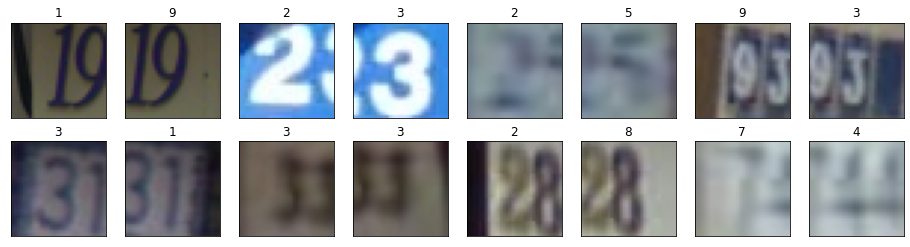

In [5]:
# Plot some training set images
plot_images(X_train, y_train, 2, 8)

In [6]:
# this is unique number of classes
print(np.unique(y_train))

[ 1  2  3  4  5  6  7  8  9 10]


In [7]:
#changing 10 to 0
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [8]:
#To speed up our experiments we will convert our images from RGB to Grayscale
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)


In [9]:
train_greyscale = rgb2gray(X_train).astype(np.float32)
test_greyscale = rgb2gray(X_test).astype(np.float32)

In [10]:
print("Training Set", train_greyscale.shape)
print("Test Set", test_greyscale.shape)
print('')

Training Set (73257, 32, 32, 1)
Test Set (26032, 32, 32, 1)



In [12]:
train_greyscale_reshape=train_greyscale.reshape(73257,1024)
test_greyscale_reshape=test_greyscale.reshape(26032,1024)


In [13]:
train_greyscale_reshape.shape

(73257, 1024)

In [19]:
#variance for each images row wise
var_images=np.var(train_greyscale_reshape,axis=1)
var_images.shape

(73257,)

In [23]:
var_images.size

73257

In [130]:
#  to find total variance of each class here for 1
v1=0
for i in range (73257):
    if y_train[i]==1:
        v1=v1+var_images[i]
    

In [131]:
#variance 0f class 2
v2=0
for i in range (73257):
    if y_train[i]==2:
        v2=v2+var_images[i]

In [132]:
v3=0
for i in range (73257):
    if y_train[i]==3:
        v3=v3+var_images[i]

In [133]:
v4=0
for i in range (73257):
    if y_train[i]==4:
        v4=v4+var_images[i]

In [134]:
v5=0
for i in range (73257):
    if y_train[i]==5:
        v5=v5+var_images[i]

In [136]:
v6=0
for i in range (73257):
    if y_train[i]==6:
        v6=v6+var_images[i]

In [138]:
v7=0
for i in range (73257):
    if y_train[i]==7:
        v7=v7+var_images[i]

In [140]:
v8=0
for i in range (73257):
    if y_train[i]==8:
        v8=v8+var_images[i]
        

In [142]:
v9=0
for i in range (73257):
    if y_train[i]==9:
        v9=v9+var_images[i]

In [334]:
#variance of number 10
v10=0
for i in range (73257):
    if y_train[i]==0:
        v10=v10+var_images[i]

In [337]:
#all variance stored in an list 
total_variance=np.array([v1,v2,v3,v4,v5,v6,v7,v8,v9,v10])
np.max(total_variance)

14850085.446670532

In [336]:
class_A= np.where(total_variance==np.max(total_variance))
class_A

(array([0], dtype=int64),)

In [338]:
class_B= np.where(total_variance==np.min(total_variance))
class_B

(array([8], dtype=int64),)

### therefore our class A is digit 1 and class B is digit 9

## #covariance for entire data set

In [339]:
np.cov(train_greyscale_reshape)

MemoryError: Unable to allocate 40.0 GiB for an array with shape (73257, 73257) and data type float64

In [340]:
import matplotlib
import matplotlib.pyplot as plt

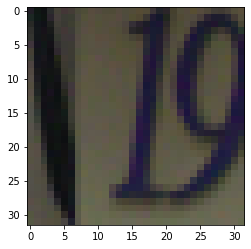

In [341]:
#to visualize image for class A
some_digitA = X_train[0] 
plt.imshow(some_digitA, cmap='gray',interpolation='nearest')


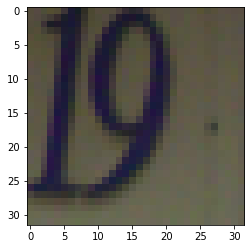

In [256]:
#to visualize image for class B
some_digitA = X_train[1] 
plt.imshow(some_digitA, cmap='gray',interpolation='nearest')

### NORMALIZTION 

In [342]:

# Calculate the mean on the training data
train_mean = np.mean(train_greyscale, axis=0)

# Calculate the std on the training data
train_std = np.std(train_greyscale, axis=0)

# Subtract it equally from all splits
train_greyscale_norm = (train_greyscale - train_mean) / train_std


In [343]:
train_greyscale_norm.shape

(73257, 32, 32, 1)

In [344]:
train_greyscale_norm_reshape=train_greyscale_norm.reshape(73257,1024)

In [345]:
import pandas as pd
df1=pd.DataFrame(train_greyscale_norm_reshape)
df2=pd.DataFrame(y_train,columns={'target'})

In [346]:
#combining 0f both xtrain and ytrain to seprate data for each classes
df3=pd.concat([df1, df2],axis=1)

In [348]:
#give the total number of all classes present
df3['target'].value_counts()

1    13861
2    10585
3     8497
4     7458
5     6882
6     5727
7     5595
8     5045
0     4948
9     4659
Name: target, dtype: int64

### seprating classes 1 and 9 and one with both class


In [349]:
table_with_0nly9=df3.loc[df3['target']==9]
table_with_0nly1=df3.loc[df3['target']==1]                       

table_with_0nly1_and_9=df3.loc[df3['target'].isin([1,9])]


In [387]:
# pandas drop a column with drop function
table_with_0nly1.drop(['target'], axis=1)
table_with_0nly1_and_9.drop(['target'], axis=1)
table_with_0nly9.drop(['target'], axis=1)
table_with_0nly9.iloc[:,0].shape


(4659,)

### applying pCA FOR class B

In [389]:
pca = PCA(2) # project from 1024 to 2 dimensions
projected = pca.fit_transform(table_with_0nly9.iloc[: , 0:1023])
print(table_with_0nly9.shape)
print(projected.shape)

(4659, 1025)
(4659, 2)


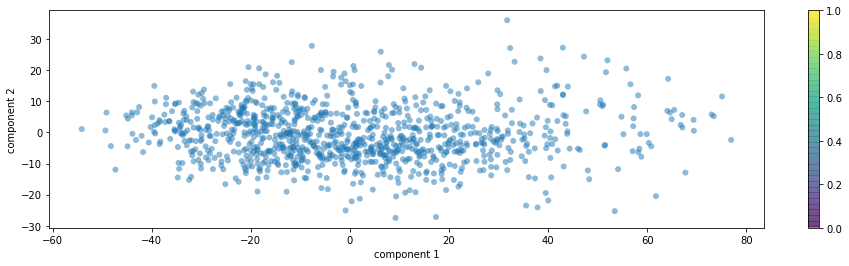

In [392]:
plt.scatter(projected[1:1000, 0], projected[1:1000, 1]
            , edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 1))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### applying pca for class A

In [394]:
pca = PCA(2) # project from 1024 to 2 dimensions
projected1 = pca.fit_transform(table_with_0nly1.iloc[: , 0:1023])
print(table_with_0nly1.shape)
print(projected1.shape)

(13861, 1025)
(13861, 2)


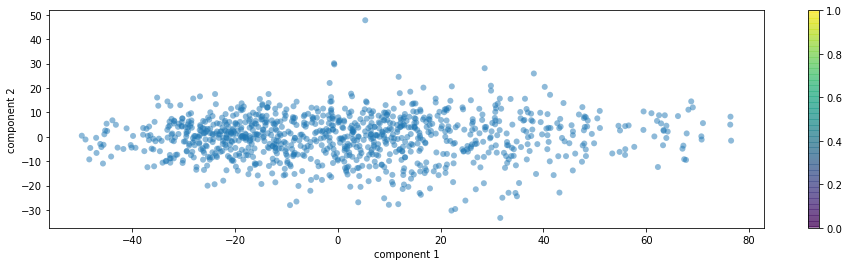

In [395]:
plt.scatter(projected1[1:1000, 0], projected1[1:1000, 1]
            , edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 1))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### PCA FOR combined class A nd B 

In [398]:
pca = PCA(2) # project from 1024 to 2 dimensions
projected2 = pca.fit_transform(table_with_0nly1_and_9.iloc[: , 0:1023])
print(table_with_0nly1_and_9.shape)
print(projected2.shape)

(18520, 1025)
(18520, 2)


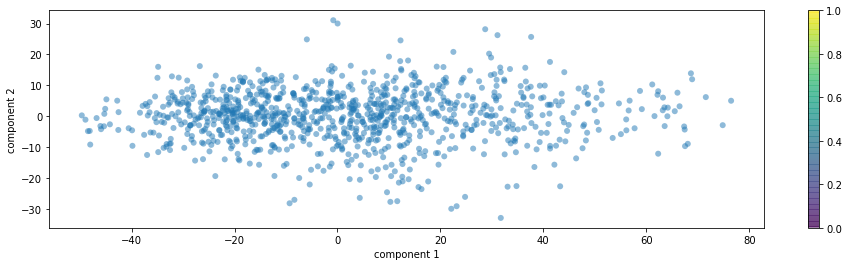

In [399]:
plt.scatter(projected2[1:1000, 0], projected2[1:1000, 1]
            , edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();